In [14]:
%matplotlib inline

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [5]:
mnist_train = pd.read_csv('E:/Data Science/Kaggle/digit-recognizer/data/train.csv')
mnist_test = pd.read_csv('E:/Data Science/Kaggle/digit-recognizer/data/test.csv')

In [6]:
print(mnist_train.shape)
print(mnist_test.shape)

(42000, 785)
(28000, 784)


In [7]:
mnist_train.keys()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [8]:
X = mnist_train.drop(['label'], axis = 1)
y = mnist_train['label']
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


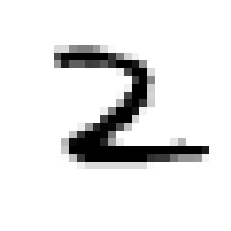

2
<class 'numpy.int64'>


In [15]:
# Trying to see, after transforming the 784 labels back to 28 X 28 pixel matrix, how the image looks - basic visualization

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[56]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis("off")
plt.show()

print(y[56])
print(type(y[56]))

# looks like 2 :P and same according the label also

In [10]:
# Splitting the train set into training and validation set
X_train, X_test, y_train, y_test = X[:36000], X[36000:], y[:36000], y[36000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36000, 784)
(6000, 784)
(36000,)
(6000,)


## Binary Classifier

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 123)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
some_digit = X.iloc[35996]

# Checking the actual label
print(y_train[35996])

# Predicting whether the binary classifier has worked fine or not.
sgd_clf.predict([some_digit])

5


array([ True])

## Performance Measure
### Accuracy using CV

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 123)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9654195483709691
0.96375
0.9346612217684807


In [19]:
# using cross validation of scikit-learn
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")


# our implementation of cross validation using stratified sampling is similar to what we've got using cross validation of scikit-learn. Great....!!

array([0.96541955, 0.96375   , 0.93466122])

## Dumb Base Estimator

In [16]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)


In [17]:
never_5_clf = Never5Classifier()

In [21]:
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.90791667, 0.91283333, 0.90608333])